In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow as tf


In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/train_data.csv',index_col=2)
test_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/test_data.csv',index_col=2)

<ipython-input-3-dcd278c5cf91>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv('/content/drive/MyDrive/ACV/ACV - Project/Project 3-Retail-Datasets-train_data/train_data.csv',index_col=2)


In [ ]:
train_data.columns
test_data.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [ ]:

x_train=train_data.drop(columns='Sales')
x_train.dtypes

Store             int64
DayOfWeek         int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
x_train['StateHoliday']=x_train['StateHoliday'].astype(str)

In [ ]:
#Labelencoding
lenc=LabelEncoder()
lenc_train=lenc.fit_transform(x_train['StateHoliday'])
lenc_train=pd.DataFrame(lenc_train)
lenc_train.head


<bound method NDFrame.head of         0
0       0
1       0
2       0
3       0
4       0
...    ..
982639  1
982640  1
982641  1
982642  1
982643  1

[982644 rows x 1 columns]>

In [ ]:
train_data_enc=train_data.drop(columns='StateHoliday')
train_data_enc.reset_index(inplace=True, drop=True)
#train_data_enc.reset_index()
#lenc_train.columns

In [ ]:
train_data_1=pd.concat([train_data_enc,lenc_train],axis=1,)
#train_data_1.set_index(train_data_enc['Date'], inplace=True)
train_data_1.dtypes
train_data_1.shape


(982644, 8)

In [ ]:
train_data_1.rename(columns={'0':'StateHoliday'},inplace=True)
type(train_data_1.columns)
train_data_1.columns = train_data_1.columns.astype(str)

In [ ]:
y_train=train_data_1['Sales']
train_data_1=train_data_1.drop(columns=['Sales','Customers'])

In [ ]:
train_data_1.columns
y_train=pd.DataFrame(y_train)
y_train.shape

(982644, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler=scaler.fit(train_data_1)
scaled_xtrain=scaler.transform(train_data_1)
scaler=scaler.fit(y_train)
scaled_ytrain=scaler.transform(y_train)


In [ ]:
scaled_xtrain.shape
#train_data.shape

(982644, 6)

In [ ]:
x_train = scaled_xtrain.astype(np.float32)
y_train = scaled_ytrain.astype(np.float32)

In [ ]:



# create ANN model
model = Sequential()

model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))

model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
history = model.fit(x_train, y_train, batch_size=20, epochs=10, verbose=1, validation_split=0.2)



Epoch 1/10
39306/39306 [==============================] - 157s 4ms/step - loss: 0.4607 - mae: 0.4506 - val_loss: 0.4387 - val_mae: 0.4521
Epoch 2/10
39306/39306 [==============================] - 146s 4ms/step - loss: 0.4562 - mae: 0.4483 - val_loss: 0.4323 - val_mae: 0.4476
Epoch 3/10
39306/39306 [==============================] - 145s 4ms/step - loss: 0.4556 - mae: 0.4477 - val_loss: 0.4349 - val_mae: 0.4479
Epoch 4/10
39306/39306 [==============================] - 149s 4ms/step - loss: 0.4522 - mae: 0.4462 - val_loss: 0.4278 - val_mae: 0.4397
Epoch 5/10
39306/39306 [==============================] - 148s 4ms/step - loss: 0.4506 - mae: 0.4455 - val_loss: 0.4278 - val_mae: 0.4422
Epoch 6/10
39306/39306 [==============================] - 149s 4ms/step - loss: 0.4503 - mae: 0.4449 - val_loss: 0.4246 - val_mae: 0.4347
Epoch 7/10
39306/39306 [==============================] - 146s 4ms/step - loss: 0.4502 - mae: 0.4444 - val_loss: 0.4329 - val_mae: 0.4450
Epoch 8/10
39306/39306 [==========

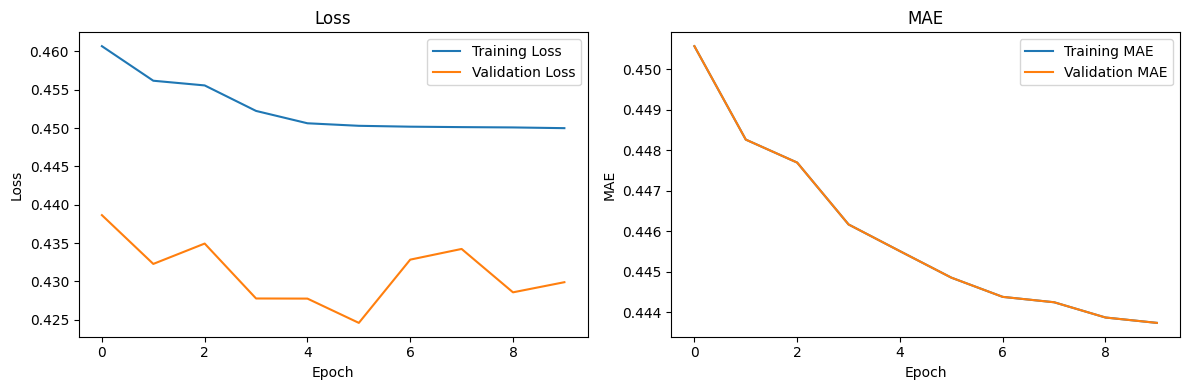

In [ ]:
# Plot the training loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['mae'], label='Validation MAE')
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
x_train_cl=x_train[['Store', 'Customers']]
y_train.columns
x_train_cl

,Store,Customers
Date,,
2015-06-30,1,568
2015-06-30,2,877
2015-06-30,3,1072
2015-06-30,4,1488
2015-06-30,5,645
...,...,...
2013-01-01,1111,0
2013-01-01,1112,0
2013-01-01,1113,0


In [ ]:
scaled_x_cl=StandardScaler().fit(x_train_cl)
scaled_x=scaled_x_cl.transform(x_train_cl)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_x,scaled_ytrain,test_size=0.2,random_state=30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

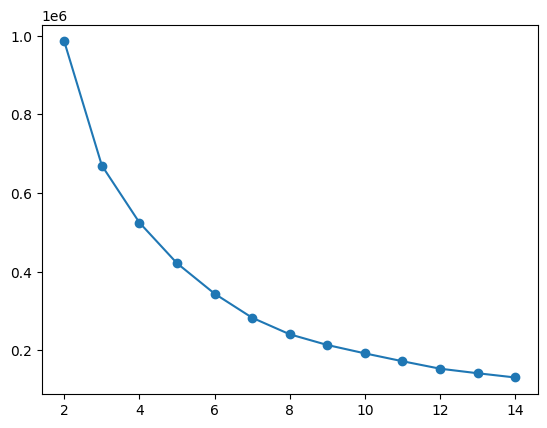

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(X_train)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

In [ ]:
kmeans = KMeans(n_clusters=14, random_state=0, n_init="auto").fit(X_train)

In [ ]:

kmeans.labels_


array([ 1,  1, 12, ..., 11,  5,  5], dtype=int32)

In [ ]:
kmeans.predict(X_test)

array([ 3, 10,  0, ...,  5,  9,  9], dtype=int32)

In [ ]:
cluster_centers=kmeans.cluster_centers_
cluster_centers

array([[-0.6489314 , -0.07439871],
       [ 1.40719043, -0.05690143],
       [ 1.20222547,  0.95777287],
       [ 0.74306959, -0.09840835],
       [ 0.25595435,  5.15991336],
       [-1.37950487, -0.09458699],
       [ 1.30296723, -1.29338486],
       [-1.29194006, -1.28834829],
       [-0.07084288,  2.38839568],
       [-0.43477226, -1.30838292],
       [-1.10951979,  0.87970084],
       [ 0.4462775 , -1.31173375],
       [ 0.07315363,  0.71934007],
       [ 0.05536858, -0.22483567]])

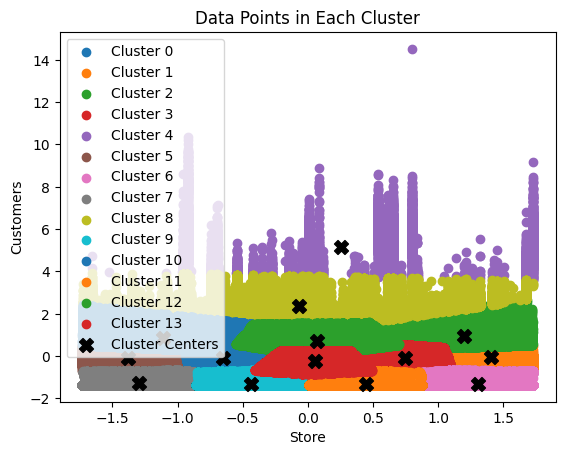

In [ ]:
for cluster_label in range(14):
    cluster_points = X_train[kmeans.labels_ == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=100, c='black', label='Cluster Centers')

plt.title('Data Points in Each Cluster')
plt.xlabel('Store')
plt.ylabel('Customers')
plt.legend()
plt.show()